## Загрузка данных и ознакомление с ними

Импортирование всех необходимых для работы библиотек

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from functools import reduce

### Информация о пользователях

In [227]:
df_users = pd.read_csv('users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,advanced
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,basic
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,basic
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,advanced
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,advanced


In [228]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

1. Данная таблица содержит общую информацию о пользователях. В ней 500 строк и 8 столбцов. 2 столбца имеют целочисленный формат, остальные столбцы - текстовый.
2. Значения в столбце *reg_date* отражают дату подключения тарифа, ее нужно перевести в специальный формат даты-времени.
3. Пропущенные значения в столбце *churn_date* говорят о том, что пользователь все еще пользуется указанным тарифом.

### Информация о тарифах

In [229]:
df_tariffs = pd.read_csv('tariffs.csv')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,basic
1,1000,30720,3000,1950,150,1,1,advanced


In [230]:
df_tariffs = df_tariffs.rename({'tariff_name' : 'tariff'}, axis='columns')

Данная небольшая таблица отражает информацию о трафиных планах. 

### Информация о звонках

In [231]:
df_calls = pd.read_csv('calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [232]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Вывод**

1. Данная таблица содержит информацию о звонках пользователей в течение 2018 года. В таблице 202607 строк и 4 столбца. Пропущенных значений нет. Каждая строка содержит информацию об одном звонке.
2. Даты звонков нужно перевести в специальный формат даты-времени.
3. Продолжительность разговора указана в минутах, тип данных - вещественный. Так как заказчик всегда округляет секунды до минут, то нам нужно округлить данную величину в большую сторону.
4. Нули в столбце продолжительности означают пропущенные звонки.

### Информация о сообщениях

In [233]:
df_messages = pd.read_csv('messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [234]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод**

1. Данная таблица содержит информацию о сообщениях пользователей. В таблице 123036 строк и 3 столбца. Пропущенных значений нет. Каждая строка характеризует одно отправленное пользователем сообщение.
2. Дату отправки сообщения нужно перевести в специальный формат даты-времени.

### Информация об интернет-сессиях

In [235]:
df_internet = pd.read_csv('internet.csv', index_col=0)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [236]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


**Вывод**

1. Данная таблица содержит информацию об интернет-сессиях пользователей. В таблице было 149396 строк и 4 столбца. Каждая строка содержит информацию об одной интернет-сессии пользователя. 
2. Пропущенных значений не обнаружено.
3. Дату нужно перевести в специальный формат даты-времени.
4. Мегабайты стоит перевести в гигабайты, однако после суммирования по месяцам.

## Подготовка данных

На данном этапе нужно привести данные к нужным форматам, найти и устранить ошибки в данных (если имеются), а также рассчитать различные метрики использования тарифа для каждого пользователя помесячно.

### Приведение данных к нужным типам

#### Пользователи

Переведем дату в корректный формат.

In [237]:
FORMAT = '%Y-%m-%d'

In [238]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=FORMAT)

In [239]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format=FORMAT)

In [240]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,basic
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,basic
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,advanced
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,advanced


In [241]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Тарифы

Переведем мегабайты в гигабайты.

In [242]:
df_tariffs['mb_per_month_included'] = (df_tariffs['mb_per_month_included'] / 1024).astype('int')
df_tariffs = df_tariffs.rename(columns={'mb_per_month_included' : 'gb_per_month_included'})

In [243]:
df_tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,basic
1,1000,30,3000,1950,150,1,1,advanced


#### Звонки

Приведем дату в корректный формат.

In [244]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=FORMAT)

Округлим продолжительность звонка до минут и приведем к целочисленному типу.

In [245]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [246]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [247]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


#### Сообщения

Как и в предыдущих случаях, переведем дату в корректный формат.

In [248]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=FORMAT)

In [249]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [250]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


#### Интернет-сессии

In [251]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=FORMAT)

In [252]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [253]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


#### Вывод

1. Даты переведены в корректный формат.
2. Продолжительность звонков округлена до минут и переведена в целочисленнный формат.

### Поиск и устранение ошибок в данных

#### Пропущенные значения

Как отмечалось выше, лишь в таблице про пользователей присутствуют пропущенные значения в столбце *churn_date*, что означает, что пользователь все еще пользовался тарифом на момент сбора данных. Данные пропуски заполнять нет смысла, так как данный столбец нерелевантен для цели исследования.

#### Дубликаты

Проверим таблицы на наличие дубликатов.

In [254]:
df_users.duplicated().sum()

0

In [255]:
df_calls.duplicated().sum()

0

In [256]:
df_messages.duplicated().sum()

0

In [257]:
df_internet.duplicated().sum()

0

Дубликаты не обнаружены.

#### Исследовательский анализ данных и поиск аномалий

##### Пользователи

In [258]:
df_users.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
user_id,500.0,NaN,NaN,NaN,1249.5,1000.0,1124.75,1249.5,1374.25,1499.0,144.481833
age,500.0,NaN,NaN,NaN,46.588,18.0,32.0,46.0,62.0,75.0,16.66763
churn_date,38,NaN,NaN,NaN,2018-11-13 00:37:53.684210432,2018-08-17 00:00:00,2018-10-14 00:00:00,2018-11-24 00:00:00,2018-12-15 12:00:00,2018-12-30 00:00:00,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,NaN,NaN,NaN,2018-06-30 18:57:35.999999744,2018-01-01 00:00:00,2018-04-07 12:00:00,2018-07-02 12:00:00,2018-09-29 00:00:00,2018-12-31 00:00:00,NaN
tariff,500,2,basic,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


С первого взгляда выглядит так, что никаких аномалий и ошибок нет. Возраст лежит в диапазоне от 18 до 75 лет, все пользователи регистрировались в 2018 году. Наибольшее количество пользователей из Москвы. Взглянем более детально на возраст, дату регистрации и города.

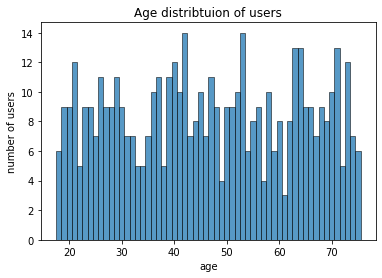

In [259]:
sns.histplot(df_users['age'], discrete=True)
plt.xlabel('age')
plt.ylabel('number of users')
plt.title('Age distribtuion of users')
plt.show()

Ничего необычного в распределении пользователей по возрасту не обнаружено.

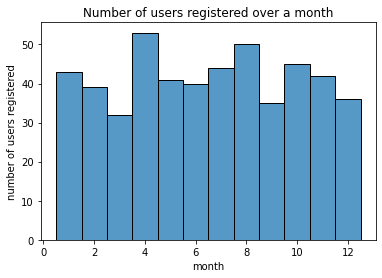

In [260]:
sns.histplot(df_users['reg_date'].dt.month, discrete=True)
plt.xlabel('month')
plt.ylabel('number of users registered')
plt.title('Number of users registered over a month')
plt.show()

Количество пользователей, зарегистрированных в каждом месяце, незначительно отличается, однако все выглядит нормально.

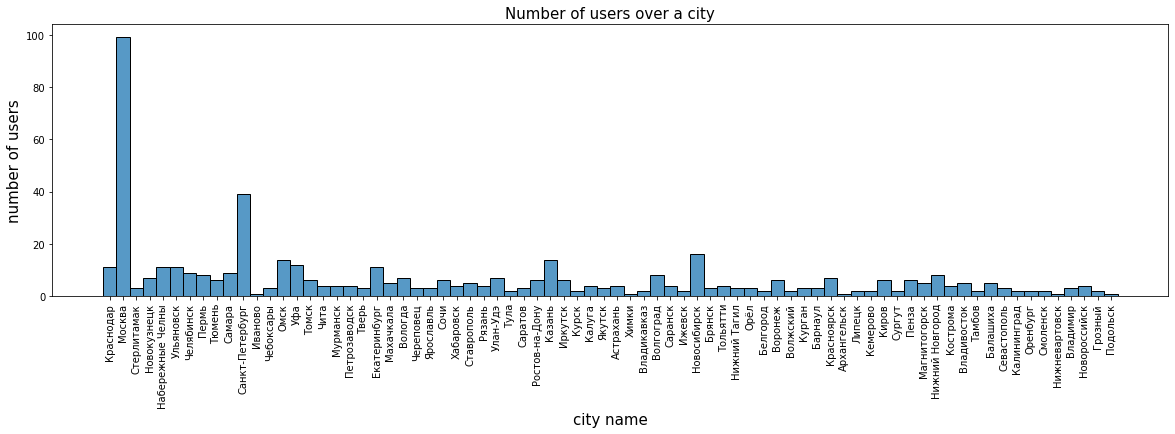

In [261]:
plt.figure(figsize=(20,5))
sns.histplot(df_users['city'])
plt.xticks(rotation=90)
plt.xlabel('city name', fontsize=15)
plt.ylabel('number of users', fontsize=15)
plt.title('Number of users over a city', fontsize=15)
plt.show()

Количество пользователей по городам также не удивляет. Абсолютный лидер - Москва, второй - Санкт-Петербург, дальше идут города, которые значительно меньше. Все логично, аномалий или ошибок нет.

##### Звонки

In [262]:
df_calls.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,202607,202607,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,202607,NaN,NaN,NaN,2018-09-02 20:01:37.583992832,2018-01-01 00:00:00,2018-07-05 00:00:00,2018-09-17 00:00:00,2018-11-14 00:00:00,2018-12-31 00:00:00,NaN
duration,202607.0,NaN,NaN,NaN,7.158198,0.0,2.0,6.0,11.0,38.0,5.959173
user_id,202607.0,NaN,NaN,NaN,1253.940619,1000.0,1126.0,1260.0,1379.0,1499.0,144.722751


С виду никаких аномалий: данные за 1 год, продолжительность звонков не превышает 38 минут. Взглянем подробнее, используя визуализацию.

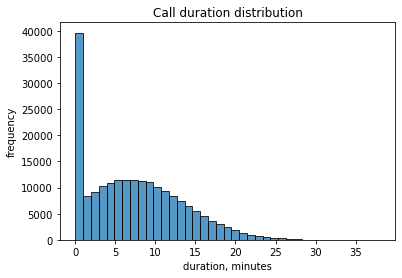

In [263]:
sns.histplot(df_calls['duration'], bins=39)
plt.xlabel('duration, minutes')
plt.ylabel('frequency')
plt.title('Call duration distribution')
plt.show()

Острый пик на нуле минут, однако мы знаем, что это пропущенные звонки. Их порядка 20% от всех звонков, что выглядит логично. Если звонок не пропущен, то наиболее частая его продолжительсность около 5-8 минут. Доля долгих звонков (от 25 минут) мала. Можно сделать вывод, что аномалий нет.

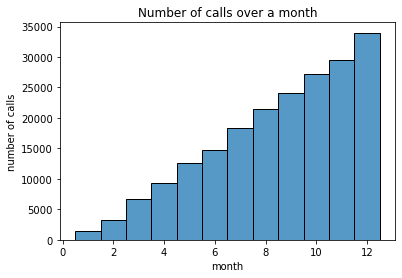

In [264]:
sns.histplot(df_calls['call_date'].dt.month, discrete=True)
plt.xlabel('month')
plt.ylabel('number of calls')
plt.title('Number of calls over a month')
plt.show()

Количество звонков в месяц росло, так как пользователи подключались в течение года, и с каждым месяцем все больше и больше людей пользовались услугами компании. Гистограмма выглядит логично.

##### Сообщения

In [265]:
df_messages.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,123036,123036,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,123036,NaN,NaN,NaN,2018-09-04 15:28:42.227640576,2018-01-02 00:00:00,2018-07-09 00:00:00,2018-09-20 00:00:00,2018-11-14 00:00:00,2018-12-31 00:00:00,NaN
user_id,123036.0,NaN,NaN,NaN,1256.98941,1000.0,1134.0,1271.0,1381.0,1499.0,143.523967


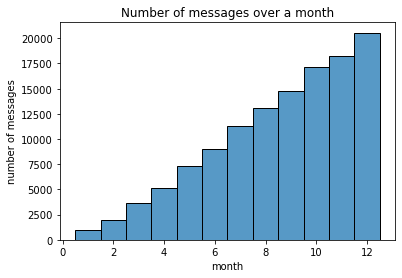

In [266]:
sns.histplot(df_messages['message_date'].dt.month, discrete=True)
plt.xlabel('month')
plt.ylabel('number of messages')
plt.title('Number of messages over a month')
plt.show()

Такая же ситуация, как и со звонками. Аномалий или ошибок не обнаружено. Стоит отметить, что первого января не было отправлено ни одного сообщения (так как в таблице выше указано, что первая дата 2018-01-02).

In [267]:
df_users[df_users['reg_date'] == '2018-01-01']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
193,1193,55,NaT,Тамбов,Арсен,Безруков,2018-01-01,basic
453,1453,50,NaT,Москва,Кузьма,Акуленко,2018-01-01,advanced


Первого января лишь 2 пользователя из датасета были подключены. Так что результат вполне нормальный.

##### Интернет-сессии

In [268]:
df_internet.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,149396,149396,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396.0,NaN,NaN,NaN,370.192426,0.0,138.1875,348.015,559.5525,1724.83,278.300951
session_date,149396,NaN,NaN,NaN,2018-09-02 12:55:35.221826560,2018-01-01 00:00:00,2018-07-05 00:00:00,2018-09-17 00:00:00,2018-11-14 00:00:00,2018-12-31 00:00:00,NaN
user_id,149396.0,NaN,NaN,NaN,1252.099842,1000.0,1130.0,1251.0,1380.0,1499.0,144.050823


Посмотрим на количество мегабайт за сессию.

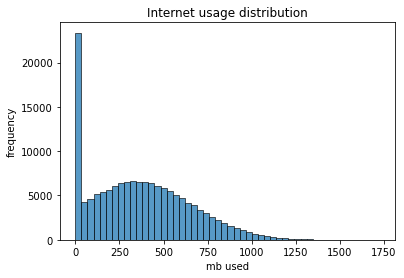

In [269]:
sns.histplot(df_internet['mb_used'], bins=50)
plt.xlabel('mb used')
plt.ylabel('frequency')
plt.title('Internet usage distribution')
plt.show()

Острый пик около нуля, говорящий о том, что очень много интернет-сессий закончились, не успев начаться, что вполне нормально, так как пользователь может открыть почтовый ящик, загрузка которого не превышает мегабайта, и тут же выйти, и это будет считаться как законченная интернет-сессия. Максимальное значение составляет около 1.75 Гб, что также нормально, пользователь может смотреть фильм с телефона. 

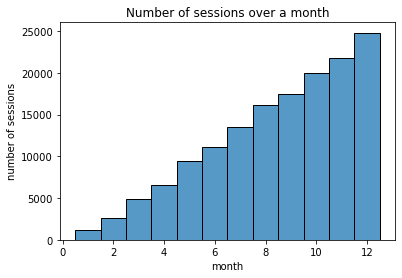

In [270]:
sns.histplot(df_internet['session_date'].dt.month, discrete=True)
plt.xlabel('month')
plt.ylabel('number of sessions')
plt.title('Number of sessions over a month')
plt.show()

Как и в прыдедущих случаях количество сессий растет из-за притока пользователей в течение года.

#### Вывод

1. Аномалий или ошибок в данных не обнаружено

### Вычисление показателей для каждого пользователя по месяцам

#### Количество звонков и израсходованных минут разговора

In [271]:
df_calls['call_month'] = df_calls['call_date'].dt.month

In [272]:
df_calls_users = df_calls.groupby(['user_id', 'call_month'])['duration'].agg(['count', 'sum']).reset_index()
df_calls_users.columns = ['user_id', 'month', 'number_calls', 'duration_calls']

In [273]:
df_calls_users.head()

,user_id,month,number_calls,duration_calls
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


#### Количество отправленных сообщений

In [274]:
df_messages['message_month'] = df_messages['message_date'].dt.month

In [275]:
df_messages_users = df_messages.groupby(['user_id', 'message_month'])['message_date'].count().reset_index()
df_messages_users.columns = ['user_id', 'month', 'number_messages']

In [276]:
df_messages_users.head(5)

,user_id,month,number_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объем израсходованного интернет-трафика

In [277]:
df_internet['session_month'] = df_internet['session_date'].dt.month

In [278]:
df_internet_users = df_internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()
df_internet_users.columns = ['user_id', 'month', 'mb_used_month']

In [279]:
df_internet_users['gb_used_month'] = np.ceil(df_internet_users['mb_used_month'] / 1024).astype(int)

In [280]:
df_internet_users = df_internet_users.drop('mb_used_month', axis=1)

In [281]:
df_internet_users.head(5)

,user_id,month,gb_used_month
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


#### Выручка

Для расчета выручки объединим полученные месячные показатели в одну таблицу. Некоторые пользователи могли звонить в каком-то месяце, но не пользоваться интернетом или сообщениями, и наоборот. Чтобы все данные попали в финальную таблицу, используем внешнее объединение.

In [282]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), [df_calls_users, df_messages_users, df_internet_users]).fillna(0)
df = df.merge(df_users, on='user_id', how='left')
df = df.merge(df_tariffs, on='tariff', how='left')

In [283]:
df.head(10)

,user_id,month,number_calls,duration_calls,number_messages,gb_used_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
5,1000,10,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
6,1000,11,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
7,1000,12,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,advanced,1000,30,3000,1950,150,1,1
8,1001,11,59.0,430.0,0.0,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,basic,50,15,500,550,200,3,3
9,1001,12,63.0,414.0,0.0,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,basic,50,15,500,550,200,3,3


В полученной таблице каждая строка содержит информацию об одном пользователе за месяц.

Напишем функцию, которая будет определять выручку с каждого пользователя.

In [284]:
def earnings(row):
    '''
    Данная функция принимает на вход строку набора данных.
    Функция выдает выручку с пользователя.
    '''
    minutes = np.clip((row['duration_calls'] - row['minutes_included']), 0, a_max=None)
    messages = np.clip((row['number_messages'] - row['messages_included']), 0, a_max=None)
    internet = np.clip((row['gb_used_month'] - row['gb_per_month_included']), 0, a_max=None)
    return (minutes * row['rub_per_minute'] + messages * row['rub_per_message'] + internet * row['rub_per_gb'] + row['rub_monthly_fee'])

In [285]:
df['earnings'] = df.apply(earnings, axis=1)

In [286]:
df.head(10)

,user_id,month,number_calls,duration_calls,number_messages,gb_used_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,earnings
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
5,1000,10,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
6,1000,11,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
7,1000,12,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,advanced,1000,30,3000,1950,150,1,1,1950.0
8,1001,11,59.0,430.0,0.0,18.0,41,NaT,Москва,Иван,...,2018-11-01,basic,50,15,500,550,200,3,3,1150.0
9,1001,12,63.0,414.0,0.0,14.0,41,NaT,Москва,Иван,...,2018-11-01,basic,50,15,500,550,200,3,3,550.0


По первым двум пользователям можно сказать, что функция работает корректно.

### Вывод

1. Данные были приведены к корректному формату.
2. В данных не было обнаружено ни дубликатов, ни пропущенных значений, ни каких-либо аномалий.
3. Были вычислены и собраны в одной таблице ежемесячные показатели каждого пользователя: количество и общая длительность звонков, количество отправленных сообщений, объем израсходованного интернет трафика, выручка.

## Анализ поведения клиентов

Проанализируем, сколько минут, сообщений и гигабайт нужно пользователям обоих тарифов. Разделим набор данных на два по названию тарифа.

In [287]:
df_basic = df.query('tariff == "basic"')
df_advanced = df.query('tariff == "advanced"')

### Минуты разговора

Посчитаем среднее, стандартное отклонение и дисперсию для каждого тарифа.

In [288]:
display(df_basic['duration_calls'].describe().to_frame())
print('Variance:', np.var(df_basic['duration_calls']))

,duration_calls
count,2229.000000
mean,417.934948
std,190.313730
min,0.000000
25%,282.000000
50%,422.000000
75%,545.000000
max,1435.000000


Variance: 36203.06665209465


In [289]:
display(df_advanced['duration_calls'].describe().to_frame())
print('Variance:', np.var(df_advanced['duration_calls']))

,duration_calls
count,985.000000
mean,526.623350
std,317.606098
min,0.000000
25%,284.000000
50%,518.000000
75%,752.000000
max,1673.000000


Variance: 100771.22361720211


Среднее количество минут в месяц для тарифа базовый - 418, для тарифа продвинутый - 527. Стандартное отклонение - 190.3 для базового, 317.6 для продвинутого. Дисперсия - 36203 для базового, 100771 для продвинутого. 

В среднем пользователи тарифа продвинутый используют больше минут, однако и разброс для них существенно выше.

Посмотрим на гистограммы и диграммы размаха для каждого тарифа.

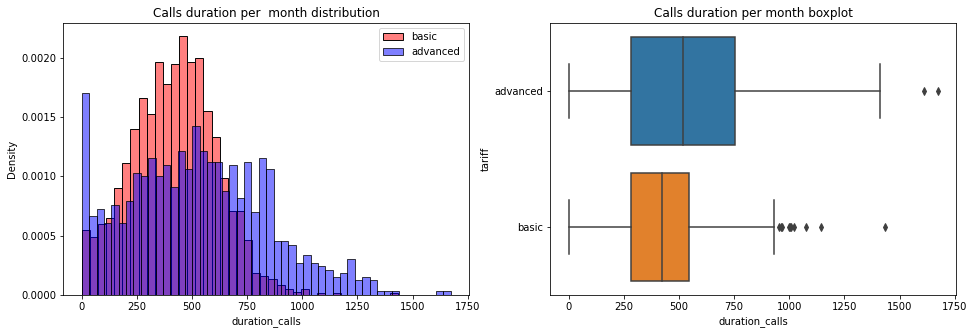

In [290]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_basic['duration_calls'], label='basic', color='red', bins=39, alpha=0.5, stat="density", ax = axes[0])
sns.histplot(df_advanced['duration_calls'], label='advanced', color='blue', bins=50, alpha=0.5, stat="density", ax = axes[0])
axes[0].legend()
axes[0].set_title('Calls duration per  month distribution')
sns.boxplot(y='tariff', x='duration_calls', data=df, orient='h', ax = axes[1])
axes[1].set_title('Calls duration per month boxplot')
plt.show()

Распределение количества минут для тарифа базовый похоже на нормальное. Наибольшее количество пользователей используют порядка 300-600 минут в месяц. Пользователей, использующих очень мало или очень много минут, относительно немного.

Распределение количества минут для тарифа продвинутый не похоже на какое-либо типичное распределение, можно лишь отметить, что оно скошено вправо. Есть узкий мощный пик на уровне 0 минут, говорящий о том, что много пользователей данного тарифа практически не совершают звонков (предположительно используют исключительно сообщения и интернет). Количество пользователей, использующих очень много минут в месяц (более 750) существенно выше для тарифа продвинутый, чем для тарифа базовый. 

По диаграмма размаха видно, что медиана у тарифа продвинутый выше, но и межквартильный размах выше, что говорит о более высоком разбросе значений. В обоих тарифах есть выбросы, характеризующие людей, использующих крайне много минут в месяц. Удалять данные наблюдения нельзя, так как никакой аномалии здесь нет.

### Количество сообщений

Посчитаем среднее, стандартное отклонение и дисперсию для каждого тарифа.

In [291]:
display(df_basic['number_messages'].describe().to_frame())
print('Variance:', np.var(df_basic['number_messages']))

,number_messages
count,2229.000000
mean,33.384029
std,28.227876
min,0.000000
25%,10.000000
50%,28.000000
75%,51.000000
max,143.000000


Variance: 796.455482917076


In [292]:
display(df_advanced['number_messages'].describe().to_frame())
print('Variance:', np.var(df_advanced['number_messages']))

,number_messages
count,985.000000
mean,49.363452
std,47.804457
min,0.000000
25%,6.000000
50%,38.000000
75%,79.000000
max,224.000000


Variance: 2282.94607539489


Среднее количество отправленных сообщений в месяц для тарифа базовый - 33, для тарифа продвинутый - 49. Стандартное отклонение - 28.2 для базового тарифа, 47.8 для продвинутого тарифа. Дисперсия - 796 для базового тарифа, 2283 для продвинутого тарифа. 

В среднем пользователи тарифа продвинутый отправляют больше сообщений, однако и разброс для них существенно выше.

Построим гистограмму и диаграмму размаха для каждого тарифа.

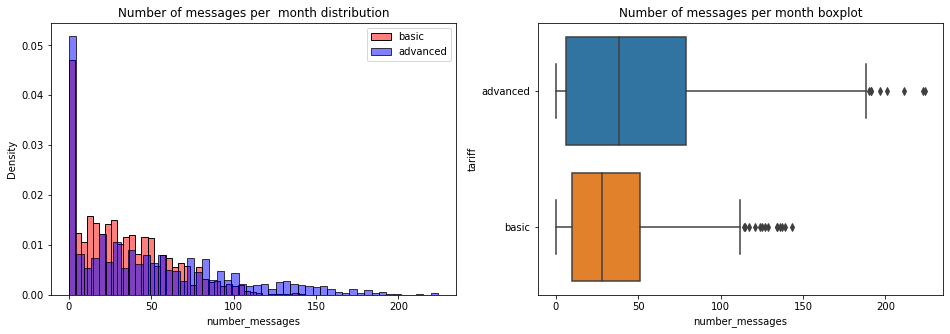

In [293]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_basic['number_messages'], label='basic', color='red', bins=39, alpha=0.5, stat="density", ax = axes[0])
sns.histplot(df_advanced['number_messages'], label='advanced', color='blue', bins=50, alpha=0.5, stat="density", ax = axes[0])
axes[0].legend()
axes[0].set_title('Number of messages per  month distribution')
sns.boxplot(y='tariff', x='number_messages', data=df, orient='h', ax = axes[1])
axes[1].set_title('Number of messages per month boxplot')
plt.show()

Оба тарифа имеют мощный острый пик на уровне 0, говорящий о том, что в обоих тарифах есть относительно большая доля пользователей, практически не использующая сообщения. Оба распределения скошены вправо. Для тарифа базовый доля людей, использующих умеренное число сообщений (до 50) выше, но для тарифа продвинутый доля людей, отправляющих много сообщений, заметно выше. 

Диаграмма размаха показывает, что медиана у тарифа продвинутый выше, но и разброс выше. Также по ней видно, что пользователи тарифа продвинутый более склонны к отправке большого количества сообщений. В обеих диаграммах наблюдаются выбросы, говорящие, что ряд пользователей отправляют экстремально много сообщений в сравнении с другими пользователями их тарифа.

### Объем интернет-трафика

Посчитаем среднее, стандартное отклонение и дисперсию для каждого тарифа.

In [294]:
display(df_basic['gb_used_month'].describe().to_frame())
print('Variance:', np.var(df_basic['gb_used_month']))

,gb_used_month
count,2229.000000
mean,16.328847
std,5.747061
min,0.000000
25%,13.000000
50%,17.000000
75%,20.000000
max,38.000000


Variance: 33.01388745483741


In [295]:
display(df_advanced['gb_used_month'].describe().to_frame())
print('Variance:', np.var(df_advanced['gb_used_month']))

,gb_used_month
count,985.000000
mean,19.494416
std,9.853511
min,0.000000
25%,12.000000
50%,19.000000
75%,27.000000
max,49.000000


Variance: 96.99311602978705


Среднее использование интернет-трафика в месяц для тарифа базовый - 16.3 Гб, для тарифа продвинутый - 19.5 Гб. Стандартное отклонение - 5.7 для базового тарифа, 9.9 для продвинутого тарифа. Дисперсия - 33 для базового, 49 для продвинутого. 

В среднем пользователи тарифа продвинутый используют больше интернет-трафика, однако и разброс для них существенно выше. Тоже самое было получено для звонков и сообщений. Возможно, это связано с размером выборки.

In [296]:
print('Кол-во пользователей тарифа базовый', len(df_users.query('tariff == "basic"')))
print('Кол-во пользователей тарифа продвинутый', len(df_users.query('tariff == "advanced"')))

Кол-во пользователей тарифа базовый 351
Кол-во пользователей тарифа продвинутый 149


Да, выборки по тарифам не равны по размеру, а как известно, с увеличением числа наблюдений разброс снижается.

Построим гистограммы использования интернета для каждого тарифа.

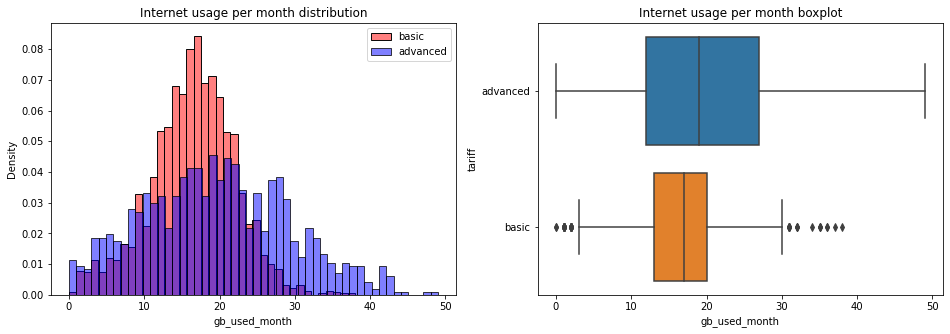

In [297]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_basic['gb_used_month'], label='basic', color='red', bins=39, alpha=0.5, stat="density", ax = axes[0])
sns.histplot(df_advanced['gb_used_month'], label='advanced', color='blue', bins=50, alpha=0.5, stat="density", ax = axes[0])
axes[0].legend()
axes[0].set_title('Internet usage per month distribution')
sns.boxplot(y='tariff', x='gb_used_month', data=df, orient='h', ax = axes[1])
axes[1].set_title('Internet usage per month boxplot')
plt.show()

Распределение для тарифа базовый имеет нормальный вид. Пик приходится на значения 16-17 Гб. Распределение для тарифа продвинутый скошено вправо, пик приходится на 19-21 Гб, однако пик слабый. Доля пользователей, использующих очень много интернет-трафика (более 25 Гб) для тарифа продвинутый существенно выше.

По диаграмме размаха видно, что медиана у тарифа продвинутый выше, но и межквартильный размах значительно выше, что опять же говорит о довольно высоком разбросе. В тарифе базовый есть выбросы, характеризующие пользователей, которые используют либо слишком много, либо слишком мало интернета в месяц, однако это нельзя назвать аномалией, так как люди используют мобильную связь по-разному.

### Вывод

1. Среднее количество минут, сообщений и объёма интернет-трафика выше для тарифа продвинутый, но и разброс от среднего существенно выше, чем для тарифа смарт.
2. Для всех трех показателей в тарифе продвинутый существенно выше доля пользователей, использующих очень много минут/сообщений/трафика. Пользователи же тарифа базовый более умеренны.
3. Среди пользователей тарифа продвинутый довольно высока доля пользователей, которые практически не используют звонки. Данная особенность не характерна для пользователей тарифа базовый.

## Проверка статистических гипотез

### Гипотеза № 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для начала взглянем на распределение выручки для каждого из тарифов и на их средние значения.

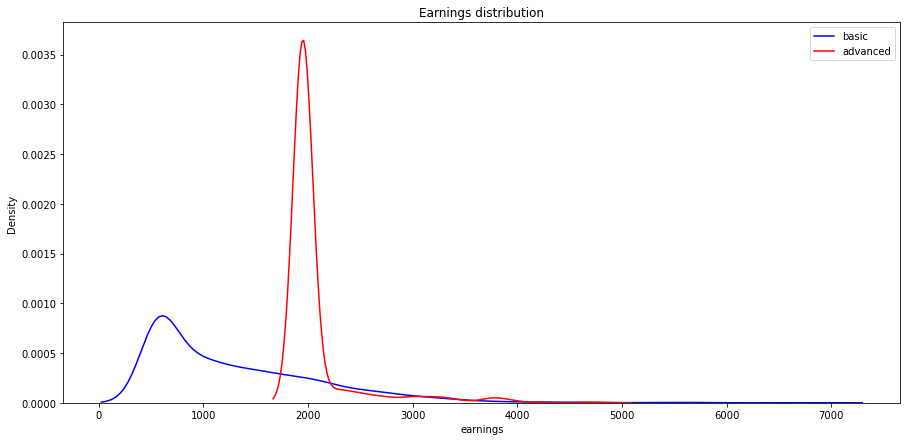

In [298]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_basic['earnings'], label='basic', color='blue')
sns.kdeplot(df_advanced['earnings'], label='advanced', color='red')
plt.legend()
plt.title('Earnings distribution')
plt.show()

In [299]:
df_basic['earnings'].describe().to_frame()

,earnings
count,2229.000000
mean,1289.973531
std,818.404367
min,550.000000
25%,550.000000
50%,1023.000000
75%,1750.000000
max,6770.000000


In [300]:
df_advanced['earnings'].describe().to_frame()

,earnings
count,985.000000
mean,2070.152284
std,376.187114
min,1950.000000
25%,1950.000000
50%,1950.000000
75%,1950.000000
max,4800.000000


С первого взгляда может показаться, что выручки не равны, и выручка тарифа продвинутый выше, однако мы имеем дело с выборками, и данная разница может быть статистически незначимой. Чтобы убедиться в том, что средняя выручка разная для тарифов, обратимся к статистическому тесту.

**Нулевая гипотеза**: средняя выручка пользователей тарифов "Базовый" и "Продвинутый" одинаковая.

**Альтернативная гипотеза**: средняя выручка пользователей тарифов разная.

**Уровень статистической значимости**: 0.05, что означает, если вероятность взять данную выборку из генеральной совокупности, при которой средняя выручка тарифов одинаковая, ниже 5%, то мы можем отвергнуть нулевую гипотезу и считать средние выручки тарифов разными.

In [301]:
basic_earnings = df_basic['earnings']
advanced_earnings = df_advanced['earnings']

results = st.ttest_ind(basic_earnings, advanced_earnings, equal_var=False)

print('p-значение:', results.pvalue)

p-значение: 4.2606313931076085e-250


Полученное p-значение значительно ниже установленного уровня статистической значимости, следовательно мы можем отвергнуть нулевую гипотезу и сделать вывод, что различие средних выручек двух тарифов статистически значимо.

### Гипотеза № 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [302]:
df_moscow = df.query('city == "Москва"')

In [303]:
df_regions = df.query('city != "Москва"')

Для начала взглянем на распределение выручки для Москвы и регионов и на их средние значения.

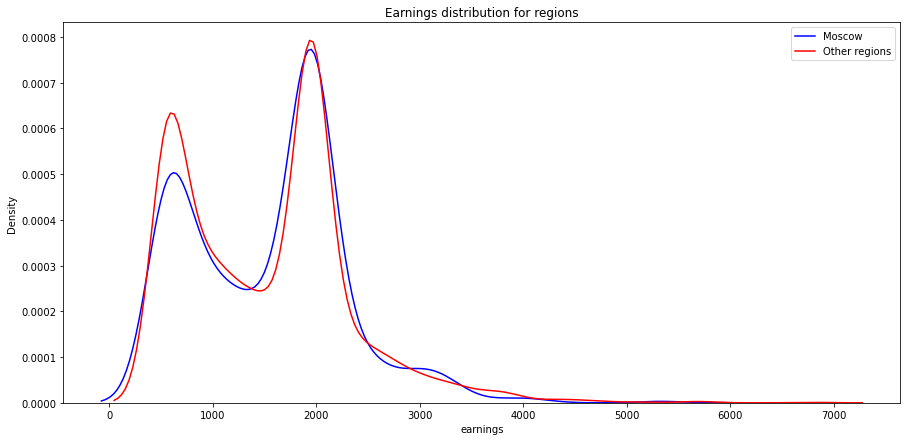

In [304]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_moscow['earnings'], label='Moscow', color='blue')
sns.kdeplot(df_regions['earnings'], label='Other regions', color='red')
plt.legend()
plt.title('Earnings distribution for regions')
plt.show()

Два ярко выраженных пика распределения соответствуют двум тарифам.

In [305]:
df_moscow['earnings'].describe().to_frame()

,earnings
count,611.000000
mean,1546.713584
std,752.088071
min,550.000000
25%,780.500000
50%,1750.000000
75%,1950.000000
max,5321.000000


In [306]:
df_regions['earnings'].describe().to_frame()

,earnings
count,2603.000000
mean,1524.936227
std,808.787752
min,550.000000
25%,750.000000
50%,1583.000000
75%,1950.000000
max,6770.000000


Распределения и их средние для Москвы и регионов очень похожи между собой. Однако, чтобы быть уверенными, проведем статистический тест.

**Нулевая гипотеза**: средняя выручка пользователей из Москвы такая же, как и пользователей из других регионов.

**Альтернативная гипотеза**: средняя выручка пользователей из Москвы и других регионов различается.

**Уровень статистической значимости**: 0.05, что означает, если вероятность взять данную выборку из генеральной совокупности, при которой средняя выручка для Москвы и регионов одинаковая, ниже 5%, то мы можем отвергнуть нулевую гипотезу и считать средние выручки регионов разными.

In [307]:
moscow_earnings = df_moscow['earnings']
regions_earnings = df_regions['earnings']

results = st.ttest_ind(moscow_earnings, regions_earnings, equal_var=False)

print('p-значение:', results.pvalue)

p-значение: 0.5257376663729298


Вероятность взять данную выборку из генеральной совокупности при условии правильности нулевой гипотезы составляет 54.4%, что значительно выше уровня статистической значимости. Следовательно, нулевая гипотеза не может быть отвергнута. Делаем вывод, что средняя выручка пользователей в Москве и регионах не отличается.

### Вывод

1. Гипотеза № 1 оказалась верной: средняя выручка тарифов различается.
2. Гипотеза № 2 была отвергнута: средняя выручка пользователей из Москвы и из других регионов не различается.

## Общий вывод

1. Был проведен анализ поведения пользователей тарифов "Базовый" и "Продвинутый" по предоставленной выборке. Были получены следующие результаты:
    1. Среднее количество минут, сообщений и объёма интернет-трафика выше для тарифа "Продвинутый", чем для тарифа "Базовый", однако и разброс от среднего существенно выше. Больший разброс для тарифа "Продвинутый" может быть связан с тем фактом, что количество данных в выборке по тарифу "Продвинутый" в 2 с лишним раза меньше.
    2. Для всех исследуемых показателей (минуты, сообщения, трафик) в тарифе "Продвинутый" существенно выше доля пользователей, использующих очень много минут/сообщений/трафика. Пользователи тарифа "Базовый" более умеренны.
    3. Среди пользователей тарифа "Продвинутый" довольно высока доля пользователей, которые практически не используют звонки. Данная особенность не характерна для пользователей тарифа "Базовый".
2. Две статистические гипотезы были проверены с помощью статистического теста, следующие выводы были получены:
    1. Средняя выручка пользователей тарифов "Базовый" и "Продвинутый" различается.
    2. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.